<a href="https://colab.research.google.com/github/Pawanme9034/Deep_learning/blob/main/dog___v__cat__image_classification_mode_in_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

coyp the api command form kaggle  AND past it with ! mark..

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

we got dog-vs-cats data in .zip file, to unzip it we use folling command

In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

generators_--

genrators are usefull in working with larg size of data


In [3]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


normlize the numpy array
normalization is required because of our data is in numpy array formate which have size of 0 to 255, we need to change it in between 0 to 1.

In [4]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

CNN model_

In [5]:
# create CNN model

model = Sequential()
# first convinationl layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
# polling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# flatten layer
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

compiling the model

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

training the model

In [8]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 101ms/step - loss: 1.3751 - accuracy: 0.6057 - val_loss: 0.6135 - val_accuracy: 0.6754
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5570 - accuracy: 0.7155 - val_loss: 0.5738 - val_accuracy: 0.7136
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4834 - accuracy: 0.7668 - val_loss: 0.4754 - val_accuracy: 0.7824
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4128 - accuracy: 0.8155 - val_loss: 0.5163 - val_accuracy: 0.7650
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3445 - accuracy: 0.8507 - val_loss: 0.4470 - val_accuracy: 0.7988
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.2602 - accuracy: 0.8929 - val_loss: 0.4798 - val_accuracy: 0.8054
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1881 - accuracy: 0.9247 - val_loss: 0.6165 - val_ac

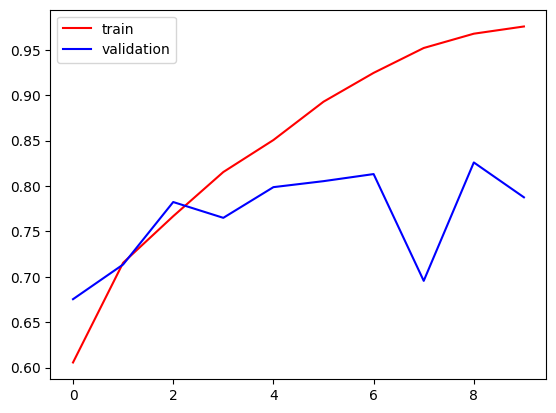

In [9]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use("dark_background")
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

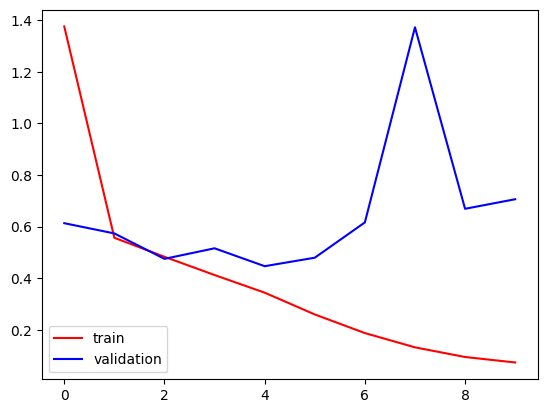

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


## Transfer learning



transfer learning is the way were we use pretend modes

In [13]:
# hear we import vgg16 mode for image classfiction
from keras.applications.vgg16 import VGG16

In [14]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [15]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [16]:
model_1= Sequential()

model_1.add(conv_base)
model_1.add(Flatten())
model_1.add(Dense(256,activation='relu'))
model_1.add(Dense(1,activation='sigmoid'))

In [17]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
conv_base.trainable = False

In [19]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [20]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [22]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [23]:
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model_1.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 60s 86ms/step - loss: 0.2824 - accuracy: 0.8813 - val_loss: 0.2293 - val_accuracy: 0.9022
Epoch 2/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1969 - accuracy: 0.9201 - val_loss: 0.2150 - val_accuracy: 0.9102
Epoch 3/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1619 - accuracy: 0.9344 - val_loss: 0.2068 - val_accuracy: 0.9130
Epoch 4/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1386 - accuracy: 0.9426 - val_loss: 0.2238 - val_accuracy: 0.9092
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.1135 - accuracy: 0.9574 - val_loss: 0.2419 - val_accuracy: 0.9062
Epoch 6/10
625/625 [==============================] - 63s 100ms/step - loss: 0.0907 - accuracy: 0.9648 - val_loss: 0.2513 - val_accuracy: 0.9104
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.0689 - accuracy: 0.9757 - val_loss: 0.2765 - val_accura

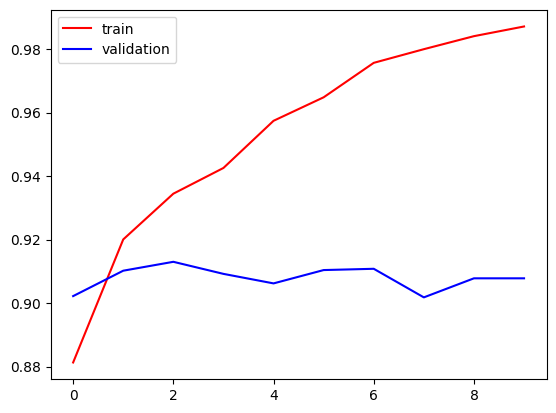

In [25]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

we can see hear overfitting

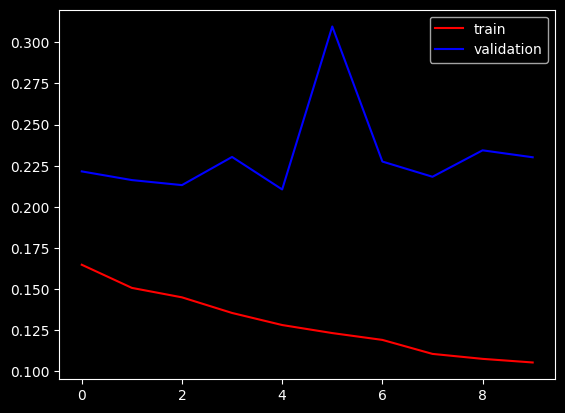

In [38]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

so redusideing overfitting we tryout feature-extraction(data-augmentation)

### feature-extraction(data-augmentation)

In [27]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

In [31]:
history = model_1.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

<ipython-input-31-8ba99ee48d76>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_1.fit_generator(


Epoch 1/10
625/625 [==============================] - 147s 236ms/step - loss: 0.1648 - accuracy: 0.9293 - val_loss: 0.2216 - val_accuracy: 0.9160
Epoch 2/10
625/625 [==============================] - 153s 245ms/step - loss: 0.1507 - accuracy: 0.9383 - val_loss: 0.2163 - val_accuracy: 0.9162
Epoch 3/10
625/625 [==============================] - 147s 235ms/step - loss: 0.1450 - accuracy: 0.9395 - val_loss: 0.2132 - val_accuracy: 0.9148
Epoch 4/10
625/625 [==============================] - 151s 241ms/step - loss: 0.1355 - accuracy: 0.9444 - val_loss: 0.2303 - val_accuracy: 0.9128
Epoch 5/10
625/625 [==============================] - 149s 238ms/step - loss: 0.1282 - accuracy: 0.9493 - val_loss: 0.2106 - val_accuracy: 0.9210
Epoch 6/10
625/625 [==============================] - 149s 239ms/step - loss: 0.1233 - accuracy: 0.9495 - val_loss: 0.3097 - val_accuracy: 0.8926
Epoch 7/10
625/625 [==============================] - 147s 235ms/step - loss: 0.1191 - accuracy: 0.9508 - val_loss: 0.2276 -

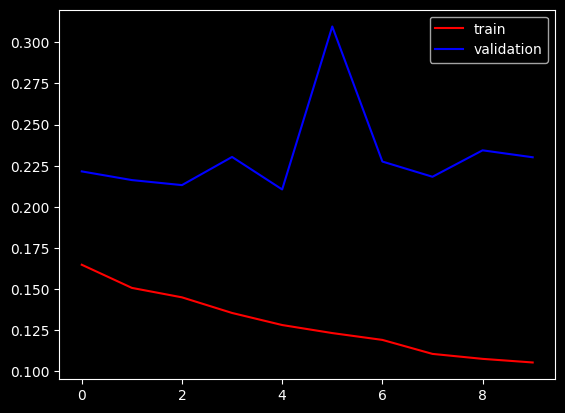

In [37]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()